# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Cristian Oyarzo M.
- Nombre de alumno 2: Sebastián Quenti A.

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/sebaquenti/Repositorio-MDS7202)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento se utilizan para ajustar el modelo, permitiéndole aprender patrones en los datos. Sin embargo, al entrenar únicamente con este conjunto, el modelo puede sobreajustarse, es decir, ajustarse demasiado a los datos específicos de entrenamiento.

    Por otro lado, los datos de validación se usan para evaluar el rendimiento del modelo en datos nuevos, lo que permite medir su capacidad de generalización y detectar sobreajuste antes de probarlo en un conjunto de prueba final.

2. El principal desafío al trabajar con problemas de clasificación en datos no supervisados es la falta de etiquetas que guíen el modelo para identificar patrones específicos.

3. La matriz de confusión es una tabla que compara las predicciones del modelo con los resultados reales, mostrando cuántas veces acertó o falló en cada clase. Sirve para entender qué tan bien está clasificando el modelo y qué tipos de errores está cometiendo, como los falsos positivos y falsos negativos.

4. * Accuracy: se calcula como (True Positives + True Negatives) / Total de Predicciones

    Mide el porcentaje total de predicciones correctas del modelo.

    * Precision: se calcula como True Positives / (True Positives + False Positives)

    Indica cuántas de las predicciones positivas hechas por el modelo son realmente correctas.

    * Recall: se calcula como True Positives / (True Positives + False Negatives)
    
    Mide la capacidad del modelo para encontrar todos los casos positivos reales.

    * F1 Score: se calcula como 2 * Precision * Recall / (Precision + Recall)

    Es la media armónica entre precisión y sensibilidad, ofreciendo un balance entre ambas.
5. * Mantenimiento predictivo de fallas de maquinaria pesada: Recall. Es fundamental detectar la mayoría de las fallas potenciales para prevenir daños costosos o accidentes, incluso si se generan algunas falsas alarmas.

    * Detección de enfermedades altamente contagiosas: Recall. Aquí es clave identificar todos los casos posibles, incluso si esto lleva a algunos falsos positivos, para evitar la propagación.

    * Aprobación de créditos de alto riesgo: Precision. Se prefiere evitar los falsos positivos (aprobar a quienes probablemente no pagarán) para reducir el riesgo financiero.

    * Detección de crímenes: Precision. Es mejor ser preciso al marcar conductas sospechosas y reducir falsos positivos, ya que un exceso de ellos podría generar desconfianza y recursos malgastados.
6. La calibración de modelos ajusta las probabilidades predichas para que reflejen mejor la realidad. Se usa cuando es importante que las predicciones probabilísticas sean precisas, como en riesgos financieros o diagnósticos médicos, ayudando a tomar decisiones más confiables.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
import pandas as pd

df = pd.read_csv('stats_players.csv')

In [2]:
df.head()

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [3]:
# 1

df_selec = df.copy()
# Se puso 1 a los jugadores que tienen algún valor en 'National_Position' y 0 en los que hay NA.
df_selec['label'] = df_selec['National_Position'].notna().astype(int)

In [4]:
# 2
df_selec['label'].value_counts()

label
0    16513
1     1075
Name: count, dtype: int64

In [5]:
# 3 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



# Identificar todas las columnas categóricas y numéricas
all_columns = df_selec.columns.drop(['Name', 'label', 'National_Position'])
numeric_columns = df_selec[all_columns].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df_selec[all_columns].select_dtypes(include=['object']).columns.tolist()

col_transformer = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_columns),   
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) 
])

4. Dado que en el html proporcionado se puede observar que las variables numéricas no presentan outliers, MinMaxScaler es ideal para normalizarlas en un rango de 0 a 1, manteniendo la proporcionalidad sin perder información. Esto asegura que cada variable contribuya de manera equilibrada al modelo.

    Para las variables categóricas, OneHotEncoder es adecuado porque representa cada categoría de forma binaria, evitando que el modelo asuma relaciones jerárquicas o de magnitud entre valores categóricos como Nationality o Club_Position, lo que asegura una interpretación neutral y precisa.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [6]:
from sklearn.model_selection import train_test_split
# 1

# Separar las características (X) y el target (y)
X = df_selec.drop(columns=['Name', 'label', 'National_Position'])
y = df_selec['label']

# Separar el conjunto de datos en entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1323, stratify=y)
print(y_train.value_counts(normalize=True))
print("")
print(y_test.value_counts(normalize=True))

label
0    0.938877
1    0.061123
Name: proportion, dtype: float64

label
0    0.938886
1    0.061114
Name: proportion, dtype: float64


Se puede observar que se mantiene la distribución de labels en ambos conjuntos.

In [7]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 2
# Definir pipeline para XGBoost con el ColumnTransformer
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier())
])

# Definir pipeline para LightGBM con el ColumnTransformer
pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier(verbose=-1))
])

In [8]:
# 3

# Entrenar ambos pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Nationality',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('classifier', LGBMClassifier(verbose=-1))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [9]:
# 1

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Realizar predicciones en el conjunto de prueba con ambos modelos
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calcular las métricas para el modelo XGBoost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost, pos_label=1)
recall_xgboost = recall_score(y_test, y_pred_xgboost, pos_label=1)

# Calcular las métricas para el modelo LightGBM
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm, pos_label=1)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm, pos_label=1)

# Generar los reportes de clasificación para ambos modelos
classification_report_xgboost = classification_report(y_test, y_pred_xgboost, target_names=['No Seleccionado', 'Seleccionado'])
classification_report_lightgbm = classification_report(y_test, y_pred_lightgbm, target_names=['No Seleccionado', 'Seleccionado'])

# Imprimir los resultados
print("Resultados de XGBoost:")
print(f"Accuracy: {accuracy_xgboost}")
print(f"Precision: {precision_xgboost}")
print(f"Recall: {recall_xgboost}")
print("Reporte de clasificación de XGBoost:")
print(classification_report_xgboost)

print("\nResultados de LightGBM:")
print(f"Accuracy: {accuracy_lightgbm}")
print(f"Precision: {precision_lightgbm}")
print(f"Recall: {recall_lightgbm}")
print("Reporte de clasificación de LightGBM:")
print(classification_report_lightgbm)

Resultados de XGBoost:
Accuracy: 0.9494030699260944
Precision: 0.6907216494845361
Recall: 0.3116279069767442
Reporte de clasificación de XGBoost:
                 precision    recall  f1-score   support

No Seleccionado       0.96      0.99      0.97      3303
   Seleccionado       0.69      0.31      0.43       215

       accuracy                           0.95      3518
      macro avg       0.82      0.65      0.70      3518
   weighted avg       0.94      0.95      0.94      3518


Resultados de LightGBM:
Accuracy: 0.9513928368391131
Precision: 0.7156862745098039
Recall: 0.3395348837209302
Reporte de clasificación de LightGBM:
                 precision    recall  f1-score   support

No Seleccionado       0.96      0.99      0.97      3303
   Seleccionado       0.72      0.34      0.46       215

       accuracy                           0.95      3518
      macro avg       0.84      0.67      0.72      3518
   weighted avg       0.94      0.95      0.94      3518



2. Ambos modelos lograron un accuracy de aproximadamente 95%, lo cual refleja una alta proporción de predicciones correctas, pero puede ser engañoso por el desbalance de clases que hay entre ser seleccionado o no.

    El modelo XGBoost, para la clase positiva, es decir, ser seleccionado nacional, tiene un 69,07% y el LightGBM un 71,57% en la métrica Precision, es posible señalar que los modelos tienen una tasa en torno al 0,7 de acierto, lo que es razonable por el desbalance de clases.

    El Recall, para el modelo XGBoost y LightGBM, es de un 31,16% y de un 33,95%, respectivamente, lo cual señala que los modelos están identificando un tercio de los jugadores seleccionados reales, esto es provocado por el mismo desbalance de clases, por lo que el modelo es más conservador a la hora de predecir si es seleccionado o no.

    Finalmente, el desbalance afectó bastante las métricas, tanto para los no seleccionados, como para los que sí lo están, ya que para el primer grupo los predice bien casi en su totalidad por ser la clase dominante, mientras que para el segundo grupo predice mayormente mal dado que es "menos probable" que lo sea al ser una clase minoritaria.




3. Dado el contexto y el desbalance de clases, la métrica más adecuada es el recall de la clase positiva (jugadores seleccionados). Esto se debe a que queremos maximizar la detección de jugadores que realmente fueron seleccionados, evitando que el modelo pase por alto muchos casos de esta clase.

    En cuanto a los resultados obtenidos, LightGBM presenta un mejor desempeño que XGBoost. Aunque ambos modelos tienen precisiones similares, LightGBM logra un recall mayor para la clase positiva (34% frente al 31% de XGBoost). Esto implica que LightGBM es ligeramente mejor en identificar jugadores seleccionados.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [10]:
df_position = df.copy()

# 1 y 2
# Función para etiquetar las posiciones en base al grupo
def etiquetar_posicion(posicion):
    if posicion in ['ST', 'CF']:
        return 'ataque'
    elif posicion in ['RW', 'CAM', 'LW']:
        return 'central_ataque'
    elif posicion in ['RM', 'CM', 'LM']:
        return 'central'
    elif posicion in ['RWB', 'CDM', 'LWB']:
        return 'central_defensa'
    elif posicion in ['RB', 'CB', 'LB']:
        return 'defensa'
    elif posicion == 'GK':
        return 'arquero'
    else:
        return None  # Para ignorar 'Sub' y 'Res'

# Aplicar la función al atributo 'Club_Position' para crear la nueva columna 'label'
df_position['label'] = df_position['Club_Position'].apply(etiquetar_posicion)

# Contar la cantidad de ejemplos por clase
label_counts = df_position['label'].value_counts(dropna=True)

# Mostrar los resulatdos
label_counts

label
defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     209
Name: count, dtype: int64

In [11]:
df.shape

(17588, 39)

In [12]:
# 3
from sklearn.linear_model import SGDClassifier


# Filtrar filas con posiciones válidas en 'label'
df_position_filtered = df_position.dropna(subset=['label'])

# Definir características (X) y la nueva etiqueta (y)
X = df_position_filtered.drop(columns=['Name', 'label', 'Club_Position'])
y = df_position_filtered['label']

# Separar los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1323, stratify=y)

# Redefinir el ColumnTransformer
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
col_transformer_position = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

# Definir el pipeline con SGDClassifier (Guía proporsionada)
pipeline_position_sgd = Pipeline(steps=[
    ('preprocessor', col_transformer_position),
    ('classifier', SGDClassifier(random_state=1323))
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline_position_sgd.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba y generar el reporte de clasificación
y_pred_sgd = pipeline_position_sgd.predict(X_test)
classification_report_position_sgd = classification_report(y_test, y_pred_sgd)

# Mostrar el reporte de clasificación
print(classification_report_position_sgd)

                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       126
         ataque       0.75      0.81      0.78        86
        central       0.53      0.65      0.59       182
 central_ataque       0.44      0.27      0.33       116
central_defensa       0.41      0.45      0.43        42
        defensa       0.89      0.86      0.87       236

       accuracy                           0.72       788
      macro avg       0.67      0.67      0.67       788
   weighted avg       0.72      0.72      0.71       788



4. Para el arquero tiene una precisión y recall perfectos (1.00), probablemente debido a que los atributos de los arqueros son muy distintos de los jugadores de campo, facilitando su identificación.

    Para defensa el modelo tiene buenas métricas que señalan un buen comportamiento para estas posiciones.

    Con respecto a ataque se tiene un Precision de 77%, lo que si bien es una buena métrica, no está al nivel de predicción de defensa.

    Luego sigue central, que tiene un Precision de 61%, probablemente debido a la similitud de atributos en posiciones cercanas en el campo, aunque mejora levemente las posiciones como central_ataque y central_defensa.

    Las posiciones mencionadas anteriormente tiene la precisión de 56% y 40%, respectivamente, lo que son malas métricas, incluso es mejor la predicción si se tira una moneda al aire para la segunda, lo que indica que el modelo no está capturando el comportamiento de los datos.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos] 

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [13]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

#Continuar código aquí

df_selec = df.copy()
df_selec['label'] = df_selec['National_Position'].notna().astype(int)
df_selec = df_selec.drop(columns=['Name', 'National_Position'])

numerical_cols = df_selec.select_dtypes(include=['int32','float64', 'int64']).columns
categorical_cols = df_selec.select_dtypes(include=['object', 'category']).columns

scaler = MinMaxScaler()
df_selec[numerical_cols] = scaler.fit_transform(df_selec[numerical_cols])

df_selec = pd.get_dummies(df_selec, columns=categorical_cols) # One hot encoding

clf_setup = setup(
    df_selec, 
    target='label',
    session_id=1323)

best_model = compare_models(
    include=['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost'], 
    sort='Precision'
)

evaluate_model(best_model)

,Description,Value
0,Session id,1323
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 234)"
4,Transformed data shape,"(17588, 234)"
5,Transformed train set shape,"(12311, 234)"
6,Transformed test set shape,"(5277, 234)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9428,0.9373,0.1011,0.7321,0.1752,0.1632,0.2542,1.9330
rf,Random Forest Classifier,0.9420,0.9263,0.0864,0.6893,0.1511,0.1401,0.2255,1.0650
catboost,CatBoost Classifier,0.9490,0.9478,0.2965,0.6868,0.4116,0.3897,0.4287,8.8540
lightgbm,Light Gradient Boosting Machine,0.9474,0.9440,0.2872,0.6632,0.3990,0.3760,0.4132,0.4670
xgboost,Extreme Gradient Boosting,0.9474,0.9469,0.3126,0.6455,0.4179,0.3941,0.4241,0.7970
dt,Decision Tree Classifier,0.9271,0.6945,0.4297,0.4082,0.4178,0.3790,0.3796,0.2930


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

2. dt (Decision Tree): Un árbol de decisiones clasifica los datos creando “ramas” basadas en condiciones. Cada nodo toma decisiones usando características específicas hasta llegar a un resultado final.

    rf (Random Forest): Un bosque aleatorio combina muchos árboles de decisión, cada uno entrenado con diferentes datos. Luego, los resultados se promedian o votan. Esto lo hace más preciso y reduce errores, evitando que se ajuste demasiado.

    et (Extra Trees): Muy parecido a Random Forest, pero con un toque extra de aleatoriedad en cómo divide los datos en cada nodo. Esto hace que el modelo sea más rápido y diverso.

3. El modelo Random Forest es la mejor opción, ya que con una precisión del 73.21%, es el más confiable en reducir la tasa de falsos positivos, que es una prioridad para Jere al buscar jugadores con verdadero potencial. Aunque su tiempo de procesamiento es de 1.007 segundos, mayor que otras opciones, sigue siendo rápido y está lejos de los 8.895 segundos de CatBoost, el modelo más lento.

    La matriz de confusión muestra una clara desbalance en las clases, con una alta precisión en la clase negativa, mientras que los positivos son en su mayoría clasificados como negativos.

    El umbral predeterminado no necesariamente es el óptimo para las predicciones. En este caso, parece que un umbral alrededor de 0.18 maximiza el valor de f_1, que es el equilibrio entre precisión y recall. 

    Las variables con mejor desempeño son "Reactions" y "Composure", esto sugiere que la habilidad de reacción y la compostura son fuertes indicadores de la etiqueta, probablemente porque están relacionadas con el rendimiento general del jugador en su posición.

    La curva muestra una alta precisión en los datos de entrenamiento (cerca de 1), mientras que la precisión en validación es más baja (alrededor de 0.94). Esto indica que el modelo puede estar sobreajustado, ya que aprende muy bien los datos de entrenamiento pero no generaliza tan bien en los datos de validación.




### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [14]:
import xgboost as xgb

df_selec = df.copy()
df_selec['label'] = df_selec['National_Position'].notna().astype(int)
df_selec = df_selec.drop(columns=['Name', 'National_Position'])

# 1

# Convertir las variables categóricas en dummies
df_encoded = pd.get_dummies(df_selec, columns=df_selec.select_dtypes(include=['object']).columns)

# Separar características y objetivo
X = df_encoded.drop(columns=['label'])
y = df_encoded['label']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1323)

# Entrenar el modelo XGBoost con todas las características
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Precision del modelo completo:", precision_score(y_test, y_pred))

Precision del modelo completo: 0.5798319327731093


In [15]:
# 2
# Obtener la importancia de las características
feature_importances = model.feature_importances_
features = X.columns

# Crear un DataFrame ordenado por importancia de características
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print("Importancia de características:\n", feature_importance_df)

Importancia de características:
                         feature  importance
11                    Reactions    0.037247
105           Nationality_India    0.026837
61         Nationality_China PR    0.026072
71   Nationality_Czech Republic    0.025582
151            Nationality_Peru    0.024732
..                          ...         ...
135      Nationality_Montserrat    0.000000
134      Nationality_Montenegro    0.000000
133         Nationality_Moldova    0.000000
45          Nationality_Belarus    0.000000
147       Nationality_Palestine    0.000000

[233 rows x 2 columns]


In [16]:
# 3
# Configuración inicial
best_precision_score = 0
best_features = X.columns

for i in range(len(feature_importance_df)):
    # Seleccionar las características más importantes
    selected_features = feature_importance_df['feature'][:len(feature_importance_df) - i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Entrenar un nuevo modelo con el conjunto reducido de características
    model = xgb.XGBClassifier()
    model.fit(X_train_selected, y_train)
    y_pred_selected = model.predict(X_test_selected)
    
    # Evaluar el rendimiento
    precision = precision_score(y_test, y_pred_selected)
    print(f"Número de características: {len(selected_features)}, PRECISION: {precision}")
    
    # Guardar el mejor conjunto de características según el F1-Score
    if precision > best_precision_score:
        best_precision_score = precision
        best_features = selected_features

# Conjunto óptimo de características
print("Mejor número de características:", len(best_features))

Número de características: 233, PRECISION: 0.5982142857142857
Número de características: 232, PRECISION: 0.5982142857142857
Número de características: 231, PRECISION: 0.5982142857142857
Número de características: 230, PRECISION: 0.5982142857142857
Número de características: 229, PRECISION: 0.5803571428571429
Número de características: 228, PRECISION: 0.5803571428571429
Número de características: 227, PRECISION: 0.5803571428571429
Número de características: 226, PRECISION: 0.5803571428571429
Número de características: 225, PRECISION: 0.5803571428571429
Número de características: 224, PRECISION: 0.5803571428571429
Número de características: 223, PRECISION: 0.5803571428571429
Número de características: 222, PRECISION: 0.5803571428571429
Número de características: 221, PRECISION: 0.5803571428571429
Número de características: 220, PRECISION: 0.5803571428571429
Número de características: 219, PRECISION: 0.5803571428571429
Número de características: 218, PRECISION: 0.5803571428571429
Número d

In [17]:
# Entrenar el modelo final con el mejor conjunto de características
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

final_model = xgb.XGBClassifier()
final_model.fit(X_train_best, y_train)
y_pred_best = final_model.predict(X_test_best)

# Evaluar el rendimiento del modelo reducido
print("Precision del modelo reducido:", precision_score(y_test, y_pred_best))

Precision del modelo reducido: 0.6610169491525424


5. El rendimiento del modelo reducido es superior al del modelo completo, con una precisión de 0.6610 frente a 0.5798. Esto indica que la selección de características ha mejorado la robustez del modelo al centrarse en las variables más importantes, eliminando el ruido y variables irrelevantes que afectaban la precisión.

    Eliminar variables tiene varios beneficios. Simplifica el modelo, lo que reduce el tiempo de entrenamiento y el uso de recursos computacionales. Además, mejora la capacidad de generalización del modelo, ya que disminuye el riesgo de sobreajuste al enfocarse en las características más relevantes.

    Finalmente, el modelo reducido es más sencillo de explicar. Con menos variables, es más claro entender el impacto de cada una en las predicciones, lo que facilita la interpretación y aumenta la transparencia del modelo. Esto hace que sea más útil para la toma de decisiones y la comunicación de resultados.

### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [18]:
# 1

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss

model_uncalibrated = final_model
model_uncalibrated.fit(X_train, y_train)

y_prob_uncalibrated = model_uncalibrated.predict_proba(X_test)[:, 1]
brier_score_uncalibrated = brier_score_loss(y_test, y_prob_uncalibrated)
print("Brier Score sin calibrar:", brier_score_uncalibrated)

calibrated_model = CalibratedClassifierCV(model_uncalibrated)
calibrated_model.fit(X_train, y_train)

y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]
brier_score_calibrated = brier_score_loss(y_test, y_prob_calibrated)
print("Brier Score calibrado:", brier_score_calibrated)


Brier Score sin calibrar: 0.03628546749308746
Brier Score calibrado: 0.037057209930024655


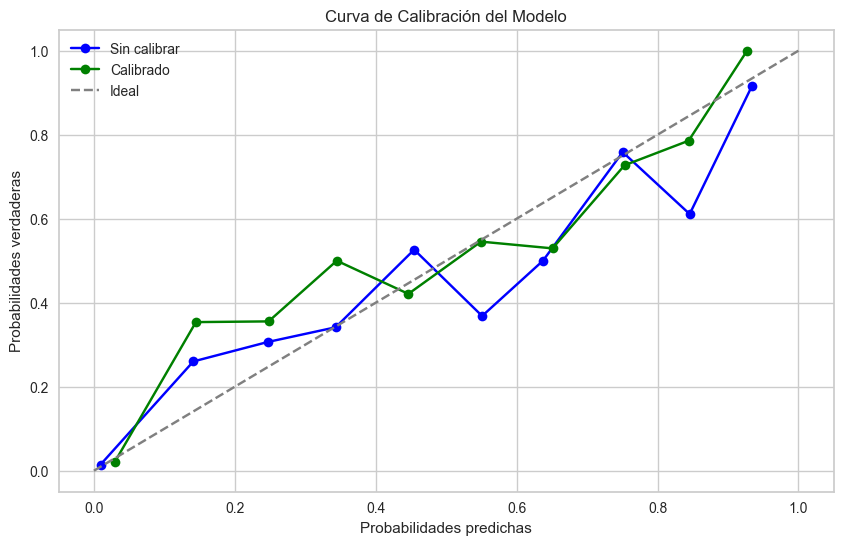

In [19]:
# 2

import matplotlib.pyplot as plt

prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_prob_uncalibrated, n_bins=10)
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_prob_calibrated, n_bins=10)

plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Sin calibrar', color='blue')
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Calibrado', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal') 

plt.xlabel("Probabilidades predichas")
plt.ylabel("Probabilidades verdaderas")
plt.title("Curva de Calibración del Modelo")
plt.legend()
plt.show()


Las predicciones se alejan de la línea ideal, lo que significa que las probabilidades no son tan confiables. Sin embargo, con la calibración (línea verde), las predicciones se acercan mucho más a lo ideal, reflejando mejor las probabilidades reales, especialmente después de 0.4. En resumen, el modelo calibrado da probabilidades más precisas y es más confiable para interpretar las predicciones.